# Experiment 10: K-Means Clustering
AIM: To perform clustering on Iris Dataset using K-Means <br>
Objective: To classify iris flowers

## Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')


## Dataset

In [2]:
df = pd.read_csv('Dataset/iris/iris.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/iris/iris.csv'

## Exploratory Data Analysis

In [ ]:
df.drop('Id',inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [ ]:
fig = px.pie(
    df, 
    names='Species',  # use lowercase 'species' in seaborn's version
    color_discrete_sequence=['#491D8B', '#7D3AC1', '#EB548C'],
    title='Data Distribution',
    template='plotly'
)
fig.update_layout(
    width=500,   # width in pixels
    height=400   # height in pixels
)

In [ ]:
sse = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i , max_iter=300)
    kmeans.fit(X) 
    sse.append(kmeans.inertia_)

fig = px.line(y=sse,template="seaborn",title='Eblow Method')
fig.update_layout(width=600, height=600,)

In [ ]:
# Independent and dependent variables
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values
# label encoding
le = LabelEncoder()
y = le.fit_transform(y)
# Feature Scaling
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Model Training

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

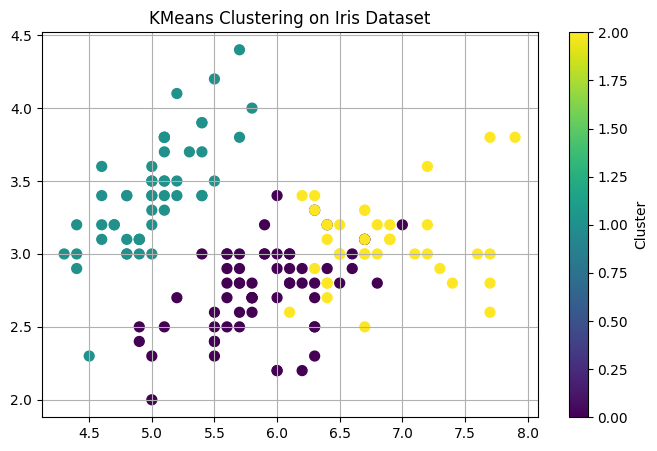

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("KMeans Clustering on Iris Dataset")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## Evaluation

<Axes: >

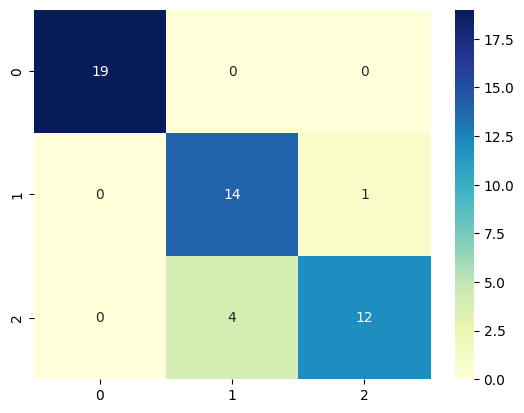

In [ ]:
y_pred = kmeans.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.93      0.85        15
           2       0.92      0.75      0.83        16

    accuracy                           0.90        50
   macro avg       0.90      0.89      0.89        50
weighted avg       0.91      0.90      0.90        50



## Conclusion
Kmeans clustering has achieved 90% accuracy in classifying iris flowers.